# RETROACTIVITY

# Preliminaries

In [1]:
import sys
sys.path.insert(0, "/Users/jlheller/home/Technical/repos/controlSBML/src")

In [2]:
import lrn_builder.slm_network
from lrn_builder.named_transfer_function import NamedTransferFunction

In [3]:
import numpy as np
import pandas as pd
import tellurium as te
import matplotlib.pyplot as plt
import sympy as sp
import control
from lrn_builder.slm_network import SLMNetwork

# Helpers 

In [4]:
s = control.TransferFunction.s
TIMES = np.linspace(0, 10, 100)

# Del Vecchio Example

## MOD1

In [5]:
# Parameters
k_Z = 1
k_Y = 2

In [6]:
MOD1 = f"""
X -> X_P; k_Z*Z
X_P -> X; k_Y*X_P

X = 0;
Z =1
X_P = 0;
k_Z = {k_Z}
k_Y = {k_Y}
"""

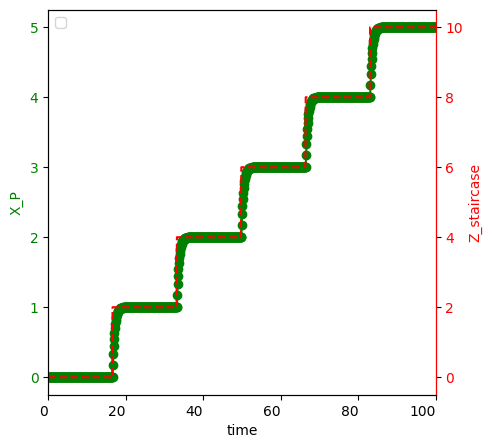

In [27]:
G1 = control.TransferFunction([k_Z], [1, k_Y])
#
mod1 = SLMNetwork(MOD1, input_name="Z", output_name="X_P",
                    kI=k_Z, kO=k_Y, transfer_function=G1)
#
times = np.linspace(0, 100, 1000)
_ = mod1.plotStaircaseResponse(times=times, final_value=10)

# MOD1_MOD2

In [8]:
# Parameters
k_p = 3

In [9]:
MOD12 = f"""
X -> X_P; k_Z*Z
X_P -> X; k_Y*X_P
X_P -> p; k_p*X_P

X = 0;
Z =1
X_P = 0;
k_Z = {k_Z}
k_Y = {k_Y}
k_p = {k_p}
"""

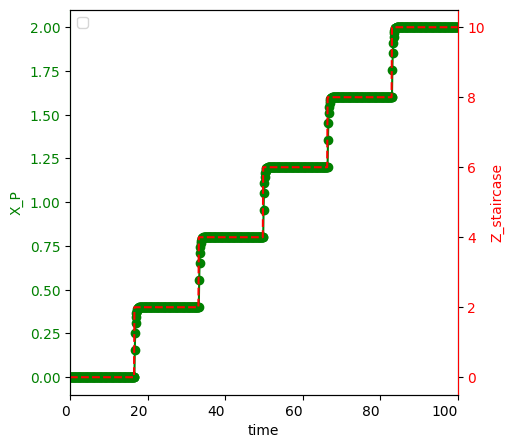

In [12]:
G12 = control.TransferFunction([k_Z], [1, k_Y + k_p])
#
mod12 = SLMNetwork(MOD12, input_name="Z", output_name="X_P",
                    kI=k_Z, kO=k_Y, transfer_function=G12)
#
times = np.linspace(0, 100, 1000)
_ = mod12.plotStaircaseResponse(times=times, final_value=10)

# MOD1p_MOD2

In [35]:
# Parameters
k_A = k_Z
k_B = 4
k_FB = k_Y

In [36]:
MOD1p2 = f"""
Z_A -> Z_B; k_A*Z_A
Z_B -> ; k_FB*X_P
X -> X_P; k_B*Z_B
X_P -> X; k_Y*X_P
X_P -> p; k_p*X_P

X = 0;
Z_A = 0
Z_B = 0
X_P = 0;
k_Z = {k_Z}
k_Y = {k_Y}
k_p = {k_p}
k_FB = {k_FB}
k_A = {k_A}
k_B = {k_B}
"""

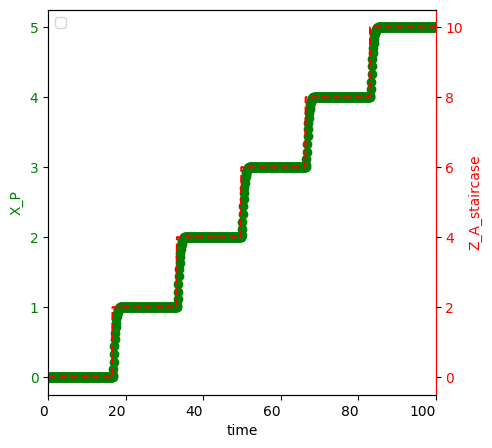

In [37]:
G1p2 = control.TransferFunction([k_A*k_B], [1, k_p, k_B*k_FB])
#
mod1p2 = SLMNetwork(MOD1p2, input_name="Z_A", output_name="X_P",
                    kI=k_Z, kO=k_Y, transfer_function=G12)
#
times = np.linspace(0, 100, 1000)
_ = mod1p2.plotStaircaseResponse(times=times, final_value=10)

In [38]:
G1p2.poles()

array([-1.5+2.39791576j, -1.5-2.39791576j])

In [39]:
G1.poles()

array([-2.+0.j])